# Carregamento dos dados

In [1]:
import pandas as pd

# Definindo o caminho para o arquivo CSV com os dados das análises de aplicativos
file_path = '../Base/apps_reviews_validacao.xlsx - apps_reviews.csv'

# Carregando os dados do arquivo CSV em um DataFrame do pandas
# Usecols: Especifica as colunas a serem carregadas do arquivo
# 'reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment' são as colunas selecionadas
# A última coluna nula é ignorada
comentarios = pd.read_csv(file_path, usecols=['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment'])

# Exibindo as primeiras 5 linhas do DataFrame para verificação
comentarios.head(5)

,reviewId,app_name,content,sentiment_polarity,sentiment
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust


In [2]:
# Gerando estatísticas descritivas para as colunas do DataFrame
comentarios.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment
count,3011,3011,3011,3011,3011
unique,3011,10,3011,3,7
top,b2ca0eda-2492-411f-b5be-e81071f52122,Shopee,O reconhecimento facial simplesmente não funci...,negative,disgust
freq,1,303,1,1742,952


In [3]:
# Acessando o valor da coluna 'content' na linha de índice 4 do DataFrame
comentarios.loc[4, 'content']

'o app é muito bom, porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix. Eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área... já deixei de fazer muitas compras por conta disso. Se puderem concertar esse bug séria ótimo para nós consumidores.'

# Pré-processamento

<p style="color:green">Removendo todo e qualquer caracter que não seja latino</p>

In [4]:
import regex

# Aplicando uma função de limpeza aos dados da coluna 'content'
# regex.sub('[^\p{Latin}]', u' ', str(x)): Substitui todos os caracteres não latinos (ou seja, caracteres fora do alfabeto latino) por espaços em branco
# A função lambda é aplicada a cada elemento da coluna 'content' para garantir que apenas caracteres latinos permaneçam
comentarios['content'] = comentarios['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

In [5]:
# Acessando o valor da coluna 'content' na linha de índice 4 do DataFrame
comentarios.loc[4, 'content']

'o app é muito bom  porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix  Eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área    já deixei de fazer muitas compras por conta disso  Se puderem concertar esse bug séria ótimo para nós consumidores '

<p style="color:green">Colocando todos os textos para minúsculo</p>

In [6]:
# Convertendo todos os textos na coluna 'content' para minúsculas
# Isso ajuda a padronizar o texto, facilitando o processamento e análise posterior
comentarios['content'] = comentarios['content'].apply(lambda x: str(x).lower())

In [7]:
# Acessando o valor da coluna 'content' na linha de índice 4 do DataFrame
comentarios.loc[4, 'content']

'o app é muito bom  porém tenho tido dificuldades para pagamento no cartão de crédito após fazer compra no pix  eu altero o meio de pagamento porém quando chega na parte de colocar o código do cartão trava e não sai daquela área    já deixei de fazer muitas compras por conta disso  se puderem concertar esse bug séria ótimo para nós consumidores '

<p style="color:green">Função para remover stopwords mais facilmente no datafreme</p>

In [8]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixando os recursos necessários do NLTK
nltk.download('stopwords') # Para obter a lista de palavras de parada (stopwords)
nltk.download('punkt')     # Para tokenização de palavras

# Função para remover palavras de parada de um texto
# stopwords.words("portuguese"): Obtém a lista de palavras de parada em português
# word_tokenize(texto): Tokeniza o texto em palavras individuais
# A lista de palavras é filtrada para remover palavras que estão na lista de palavras de parada
def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dougl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dougl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<p style="color:green">Remover stopwords usando a função definida acima</p>

In [9]:
# Aplicando a função remove_stopwords a cada texto na coluna 'content'
# Isso remove palavras de parada de todos os textos na coluna, ajudando a limpar e melhorar a análise de texto
comentarios['content'] = comentarios['content'].apply(remove_stopwords)

In [10]:
# Acessando o valor da coluna 'content' na linha de índice 4 do DataFrame
comentarios.loc[4, 'content']

'app bom porém tido dificuldades pagamento cartão crédito após fazer compra pix altero meio pagamento porém chega parte colocar código cartão trava sai daquela área deixei fazer muitas compras conta disso puderem concertar bug séria ótimo consumidores'

# Extração da features (representação de texto em formato vetorial)

<p style="color:green">A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo TF-IDF.</p> 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Criando uma instância do TfidfVectorizer
# O TfidfVectorizer converte uma coleção de documentos de texto em uma matriz de características TF-IDF
# TF-IDF é uma técnica que avalia a importância de uma palavra em um documento em relação a um corpus de documentos
tfidf_vectorizer = TfidfVectorizer()

In [12]:
# Transformando o texto da coluna 'content' em uma matriz TF-IDF
# fit_transform: Ajusta o modelo aos dados de texto e transforma os dados em uma matriz esparsa de características TF-IDF
# tfidf_matrix: Matriz onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(comentarios['content'])

In [13]:
# Convertendo a matriz TF-IDF em um DataFrame do pandas
# tfidf_matrix.toarray(): Converte a matriz esparsa TF-IDF em uma matriz densa (array)
# tfidf_vectorizer.get_feature_names_out(): Obtém os nomes das características (palavras) do vetor TF-IDF para usar como colunas do DataFrame
# tfidf_df: DataFrame onde cada linha representa um documento e cada coluna representa uma palavra, com valores TF-IDF
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Exibindo o DataFrame para verificar a transformação
tfidf_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<p style="color:green">Conferir se as linhas contém valores diferentes de zero.</p> 

In [14]:
# Contando o número de termos não nulos (ou seja, diferentes de zero) em cada documento
# (tfidf_df != 0): Cria uma matriz booleana onde True indica um valor não nulo
# .sum(axis=1): Conta o número de valores True (não nulos) em cada linha (documento)
# non_zero_counts: Série onde cada valor representa o número de termos não nulos em um documento
non_zero_counts = (tfidf_df != 0).sum(axis=1)

# Exibindo as primeiras 5 contagens de termos não nulos por documento
non_zero_counts.head()

0    44
1    38
2    33
3    41
4    33
dtype: int64

# Treinamento e teste

<p style="color:green">Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (tfidf_df) em um conjunto de teste e outro treinamento. </p>

In [15]:
# Categoria a serem previstas
categorias = comentarios[['sentiment_polarity', 'sentiment']]

In [16]:
from sklearn.model_selection import train_test_split

# Dividindo o conjunto de dados em conjuntos de treino e teste
# test_size=0.2: 20% dos dados serão usados para teste, e o restante para treino.
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, categorias, test_size=0.2)

# Extraindo as colunas 'sentiment_polarity' e 'sentiment' dos conjuntos de treino e teste
y_train_polarity = y_train['sentiment_polarity']
y_test_polarity = y_test['sentiment_polarity']
y_train_sentiment = y_train['sentiment']
y_test_sentiment = y_test['sentiment']


In [17]:
from sklearn.naive_bayes import MultinomialNB

# Criando instâncias do classificador Naive Bayes Multinomial para cada tarefa
naive_bayes_polarity = MultinomialNB()  # Classificador para prever a polaridade do sentimento
naive_bayes_sentiment = MultinomialNB()  # Classificador para prever o sentimento

# Treinando os classificadores com os dados de treino
naive_bayes_polarity.fit(X_train, y_train_polarity)
naive_bayes_sentiment.fit(X_train, y_train_sentiment)

# Realizando previsões nos dados de teste usando os classificadores treinados
predicoes_polarity = naive_bayes_polarity.predict(X_test)  # Previsões para a polaridade do sentimento
predicoes_sentiment = naive_bayes_sentiment.predict(X_test)  # Previsões para o sentimento

In [18]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador para a previsão do sentimento
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
print("\nAvaliação para 'sentiment':")
print(classification_report(y_test_sentiment, predicoes_sentiment))


Avaliação para 'sentiment':
              precision    recall  f1-score   support

       anger       0.69      0.28      0.40       154
     disgust       0.51      0.72      0.59       203
        fear       0.00      0.00      0.00        11
   happiness       0.00      0.00      0.00        59
     neutral       0.00      0.00      0.00         9
     sadness       0.48      0.73      0.58       166
    surprise       0.00      0.00      0.00         1

    accuracy                           0.51       603
   macro avg       0.24      0.25      0.22       603
weighted avg       0.48      0.51      0.46       603



c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

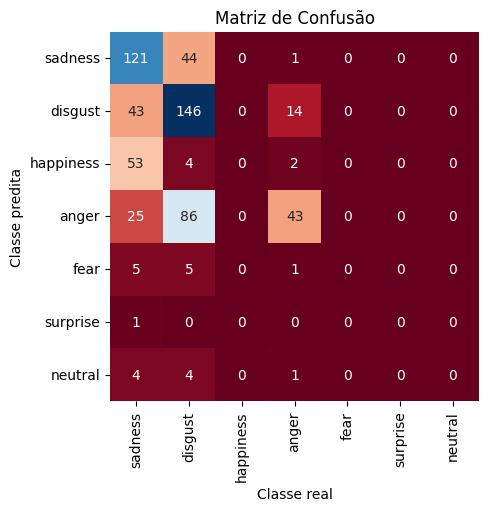

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos de sentimento para configurar os eixos da matriz de confusão
sentiment_labels = comentarios['sentiment'].unique()

# Calculando a matriz de confusão
# y_test_sentiment: Rótulos reais dos dados de teste para o sentimento
# predicoes_sentiment: Rótulos previstos pelo classificador para o sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_sentiment, predicoes_sentiment, labels=sentiment_labels)

# Criando um gráfico da matriz de confusão usando seaborn
# annot=True: Adiciona anotações com os valores das células
# fmt='d': Formata os valores das anotações como inteiros
# cmap='RdBu': Define o mapa de cores para o gráfico
# cbar=False: Remove a barra de cores
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels,
            yticklabels=sentiment_labels)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico

In [20]:
from sklearn.metrics import classification_report

# Avaliando o desempenho do classificador para a previsão da polaridade
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador para a polaridade do sentimento
print("\nAvaliação para 'polarity':")
print(classification_report(y_test_polarity, predicoes_polarity))


Avaliação para 'polarity':
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84       368
     neutral       0.00      0.00      0.00         9
    positive       0.81      0.60      0.69       226

    accuracy                           0.79       603
   macro avg       0.53      0.51      0.51       603
weighted avg       0.78      0.79      0.77       603



c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dougl\OneDrive\Desktop\CD2\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

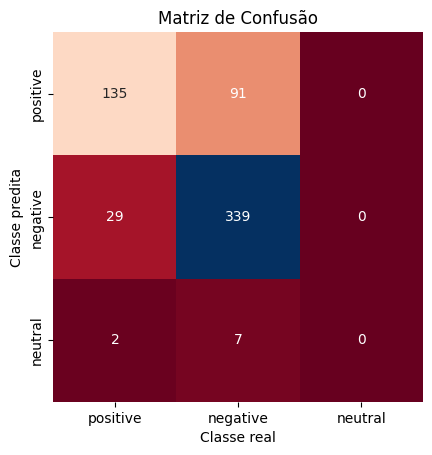

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtendo os rótulos únicos de polaridade para configurar os eixos da matriz de confusão
sentiment_labels_pol = comentarios['sentiment_polarity'].unique()

# Calculando a matriz de confusão
# y_test_polarity: Rótulos reais dos dados de teste para a polaridade do sentimento
# predicoes_polarity: Rótulos previstos pelo classificador para a polaridade do sentimento
# labels: Rótulos das classes para garantir que a matriz de confusão tenha as mesmas ordens de classes
cm = confusion_matrix(y_test_polarity, predicoes_polarity, labels=sentiment_labels_pol)

# Criando o gráfico da matriz de confusão usando seaborn
sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False, 
            xticklabels=sentiment_labels_pol,
            yticklabels=sentiment_labels_pol)

plt.xlabel("Classe real")    # Rótulo do eixo x
plt.ylabel("Classe predita") # Rótulo do eixo y
plt.title("Matriz de Confusão") # Título do gráfico
plt.show() # Exibindo o gráfico